In [2]:
from torchvision import datasets, models, transforms
from PIL import Image
import os
import matplotlib.pyplot as plt
import random
import numpy as np
import skimage
from helper_functions import CustomRescaleTransform
import albumentations as A
from albumentations.pytorch import ToTensorV2
import cv2

## Autoreload

In [3]:
%load_ext autoreload
%autoreload 2

## Torchvision

In [4]:
# Set a random seed for reproducibility
random.seed(30)

images = [
    "878968_1256244_13026676_Left External.JPG",
    '599078_1453469_14443867_Right External.jpg',
    '935873_1343143_13668663_Left External.jpg'
]
input_size = 299
t_torchvision = transforms.Compose(
    [
        transforms.Resize(size=(input_size, input_size)),
        # transforms.RandomResizedCrop(input_size), TODO: Try this
        
        # transforms.ColorJitter(
        #     brightness=0.1148, 
        #     #brightness=0, 
        #     contrast=(0.9997, 1.7705),
        #     # contrast=0,
        #     #saturation=0, 
        #     saturation=(0.5597, 1.2749),
        #     #hue=0,
        #     hue=0.0251,
        # ),
        
        # CustomRescaleTransform(crop_size=input_size, rescale_factors=[1.3, 1.5]),
        
        #transforms.RandomHorizontalFlip(), 
        #transforms.RandomVerticalFlip(), 
        #transforms.ToTensor(),
        #transforms.Normalize(training_image_mean, training_image_std)

        transforms.ColorJitter(
            brightness=0.1148,
            contrast=(0.9997, 1.7705),
            saturation=(0.5597, 1.2749),
            hue=0.0251,
        ),
        CustomRescaleTransform(crop_size=input_size, rescale_factors=[1.3, 1.5]),
    ]
)

In [5]:
images_root = './EyePacs1KDataset/587_587_resized_images'
image_path_fp = os.path.join(images_root, images[0]) 
image = Image.open(image_path_fp).convert('RGB')

/home/tleyden/Development/youth_eye_health/helper_functions.py:553: FutureWarning: `multichannel` is a deprecated argument name for `rescale`. It will be removed in version 1.0. Please use `channel_axis` instead.
  scale_out = skimage.transform.rescale(image_np, scale=rescale_factor, mode='constant', anti_aliasing=True, multichannel=True)


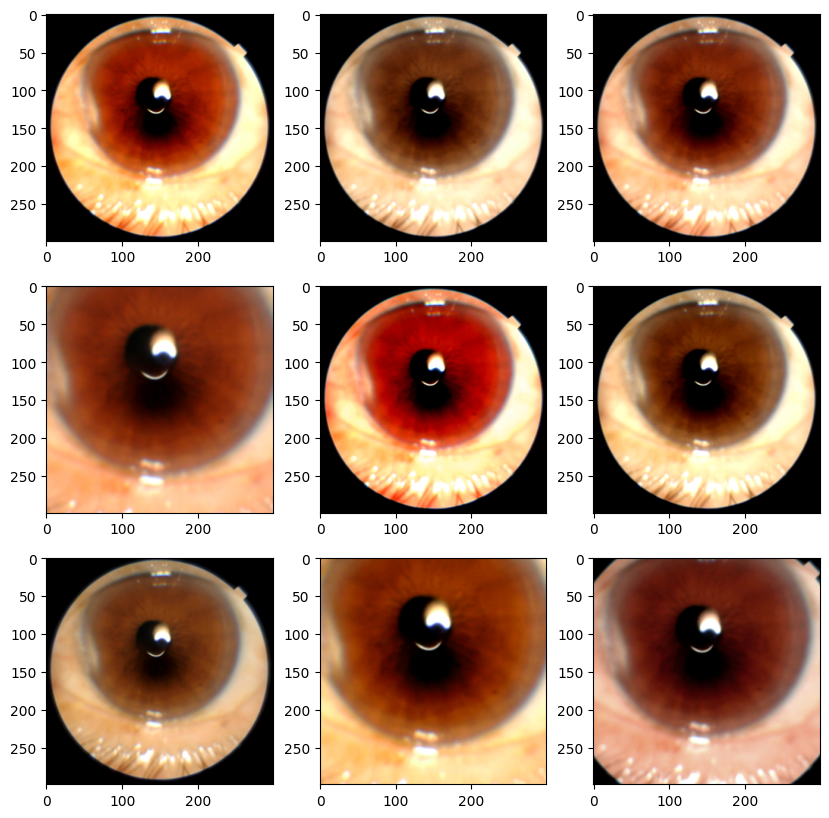

In [6]:
plt.figure(figsize=(10, 10))
source_image = Image.open(image_path_fp).convert('RGB')

for i in range(9):
    augmented = t_torchvision(source_image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented)

In [7]:
# image_np = np.array(image)

# # multichannel=True needed so it doesn't change the number of channels
# # see https://stackoverflow.com/questions/64619498/skimage-transform-rescale-adds-an-extra-dimension-to-input-image
# scale_out = skimage.transform.rescale(image_np, scale=1.2, mode='constant', anti_aliasing=True, multichannel=True)

# scale_out_unnorm = scale_out * 255

# image_scale_out = Image.fromarray(scale_out_unnorm.astype('uint8'), 'RGB')

# plt.imshow(image_scale_out)

In [8]:
# scale_out.shape

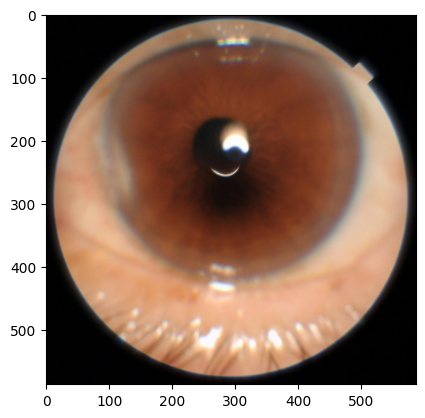

In [9]:
custom_transformer = CustomRescaleTransform(crop_size=584, rescale_factors=[1.3, 1.5])
image_transformed = custom_transformer(image)
plt.imshow(image_transformed)

In [10]:
# print(image_path_fp)
# image = Image.open(image_path_fp).convert('RGB')
# image_np = np.array(image)
# PIL_image = Image.fromarray(image_np.astype('uint8'), 'RGB')

In [11]:
# plt.imshow(PIL_image)

## Albumentations

In [1]:
t = A.Compose([
    #A.RandomResizedCrop(input_size, input_size, scale=(0.25, 1.0), p=0.5),
    # A.RandomBrightnessContrast(
    #     brightness_limit=0.11,
    #     contrast_limit=(-0.1,0.5),
    # ),
    # A.HueSaturationValue()
    A.ColorJitter(
        brightness=0.1148,
        contrast=(0.9997, 1.7705),
        saturation=(0.5597, 1.2749),
        hue=0.0251,
    ),
    A.RandomResizedCrop(input_size, input_size, scale=(0.4, 1.0), p=0.5, ratio=(1.0,1.0)),
    # A.RandomSizedCrop(
    #     min_max_height=(input_size // 2, input_size // 2), 
    #     height = input_size, 
    #     width = input_size, 
    #     w2h_ratio=1.0, 
    #     interpolation=1, 
    #     always_apply=False, 
    #     p=0.5
    # )
    A.Cutout(num_holes=8, max_h_size=16, max_w_size=16, fill_value=0, always_apply=False, p=0.5),
])

plt.figure(figsize=(10, 10))
source_image = cv2.imread(image_path_fp)
source_image = cv2.cvtColor(source_image, cv2.COLOR_BGR2RGB)

for i in range(9):
    augmented = t(image=source_image)
    image = augmented['image']
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image)

NameError: name 'A' is not defined

### Cutout